In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df12 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB12H.csv')
df11 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB11H.csv')
df10 = pd.read_csv('/Users/jinc/Desktop/프로젝트/학부연구/재정패널조사/[NaSTaB]EXCEL_H/NaSTaB10H.csv')

**Korea CPI**

- 2017 -> 100
- 2018 -> 101.476
- 2019 -> 101.865

In [3]:
cpi18 = 1.01476
cpi19 = 1.01865

# Data Cleaning

In [4]:
df12 = df12.rename(columns={'hid12':'hid'})
df11 = df11.rename(columns={'hid11':'hid'})
df10 = df10.rename(columns={'hid10':'hid'})

df = pd.merge(df10 ,df11, how='inner', on='hid')
df = df.merge(df12, how='inner', on='hid')

In [5]:
# Financial assets
fin = [f'fa00{i}' for i in range(2,10,2)] + \
      [f'fa0{i}' for i in range(10,20,2)]

finname = ['deposit',
           'fund',
           'bond',
           'stock',
           'insurance',
           'lend',
           'other',
           'mortage',
           'pension']

# Monthly consumption, savings, income
monthly = [f'ca00{i}' for i in range(1,5)]
monthlyname = ['income1',
               'consumption',
               'saving',
               'income2']

In [6]:
# Real-estate
re = ['fb031','fb010','fb012','fb022','fb024']
# 현재거주주택, 외 보유 주택, 토지건물, 토지, 건물
rename = []

# Other assets
other = ['fb026','fb042','fb020']
# 귀금속, 자동차, 기타자산

In [7]:
# Selecting features
vars = []
for n in range(10,13):
    var = ['hid'] + \
          [f'h{n}{i}' for i in monthly] + \
          [f'h{n}{i}' for i in fin]
    vars.append(var)

In [8]:
# Reshape wide to long data structure
# 2017
df1 = df[vars[0]].copy()
df1.columns = ['hid'] + monthlyname + finname
df1['yearID'] = 2017

# 2018
df2 = df[vars[1]].copy()
df2.columns = ['hid'] + monthlyname + finname
df2['yearID'] = 2018

# 2019
df3 = df[vars[2]].copy()
df3.columns = ['hid'] + monthlyname + finname
df3['yearID'] = 2019

# Concat
df = pd.concat([df1, df2, df3])
df.insert(1, 'yearID', df.pop('yearID'))

In [9]:
# Delete rows with value -9, outlier
df = df.fillna(0)
df = df.replace(-9, np.NaN)
df = df.dropna()

In [10]:
df.describe()

,hid,yearID,income1,consumption,saving,income2,deposit,fund,bond,stock,insurance,lend,other,mortage,pension
count,13687.000000,13687.000000,13687.000000,13687.000000,13687.000000,13687.000000,13687.000000,13687.000000,13687.000000,13687.000000,13687.000000,13687.000000,13687.000000,13687.000000,13687.000000
mean,22351.637832,2018.001607,4.586615,253.845912,63.949587,410.333601,3221.086652,131.246804,28.022211,353.701907,299.062249,53.018631,74.659750,18.144371,439.922481
std,24358.939929,0.816674,2.777715,178.012350,99.861150,361.206263,6312.711790,2216.054738,751.706712,2978.432963,1608.111509,870.553910,1423.398696,83.523321,14852.361712
min,10002.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11718.000000,2017.000000,2.000000,120.000000,0.000000,176.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13367.000000,2018.000000,4.000000,200.000000,30.000000,350.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14835.500000,2019.000000,6.000000,350.000000,100.000000,550.000000,3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,94991.000000,2019.000000,11.000000,4000.000000,2000.000000,9000.000000,131200.000000,210000.000000,50000.000000,100000.000000,117720.000000,40000.000000,70000.000000,3600.000000,999999.000000


In [11]:
# create total sum of financial assets
df['total_a'] = df['deposit'] + df['fund'] + df['bond'] + df['stock'] + df['insurance'] + df['lend'] + df['other'] + df['mortage'] + df['pension']
df['total_b'] = df['fund'] + df['bond'] + df['stock'] + df['insurance'] + df['lend'] + df['other'] + df['mortage'] + df['pension']

# df[finname] = df[finname].replace(0, np.NaN)

# EDA

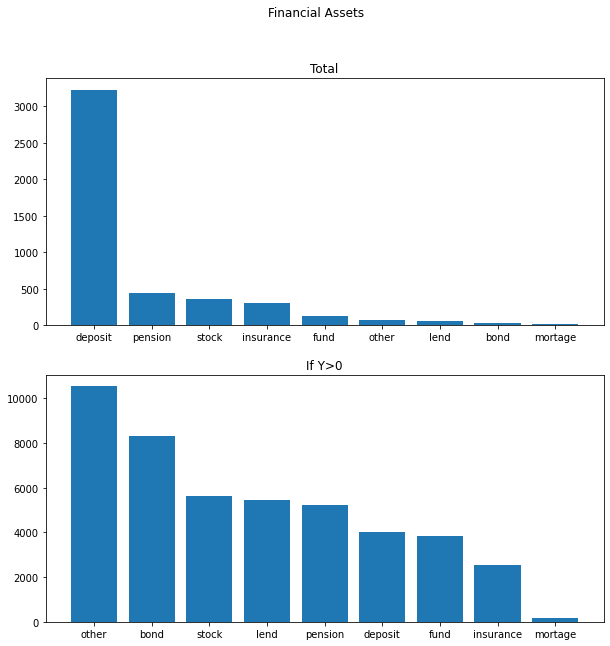

In [12]:
f,ax = plt.subplots(2,1,figsize=(10,10))
plt.suptitle('Financial Assets')

# Proportion of assets (Total)
x = df[finname].mean().sort_values(ascending=False).index
y = df[finname].mean().sort_values(ascending=False).values
ax[0].bar(x,y)
ax[0].set_title('Total')

# Condition (Y>0)
x = df[finname].replace(0,np.NaN).mean().sort_values(ascending=False).index
y = df[finname].replace(0,np.NaN).mean().sort_values(ascending=False).values
ax[1].bar(x,y)
ax[1].set_title('If Y>0')
plt.show()


In [13]:
# Find percentage of each assets by year
ratio_a = df[['yearID']].copy()
for i in df[finname]:
    ratio_a[i] = df[i] / df['total_a'].copy() * 100

ratio_b = df[['yearID']].copy()
for i in df.loc[:,'fund':'pension']:
    ratio_b[i] = df[i] / df['total_b'].copy() * 100

ratio_a = ratio_a.groupby('yearID').mean()
ratio_b = ratio_b.groupby('yearID').mean()

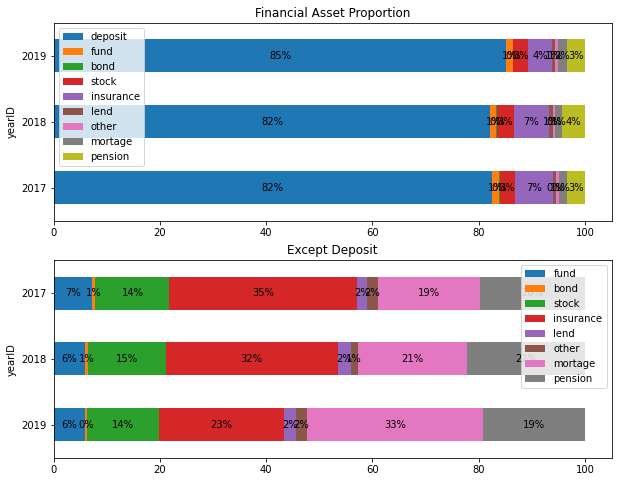

In [14]:
f,ax = plt.subplots(2,1,figsize=(10,8))
ax[0].set_title('Financial Asset Proportion')
ax[1].set_title('Except Deposit')

# All assets
a = ratio_a.plot.barh(stacked=True, ax=ax[0])
plt.gca().invert_yaxis() # reverse order(top to down)
for n in a.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    a.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

# Except deposit asset
b = ratio_b.plot.barh(stacked=True, ax=ax[1])
plt.gca().invert_yaxis() # reverse order(top to down)
for n in b.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    b.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

# Rat

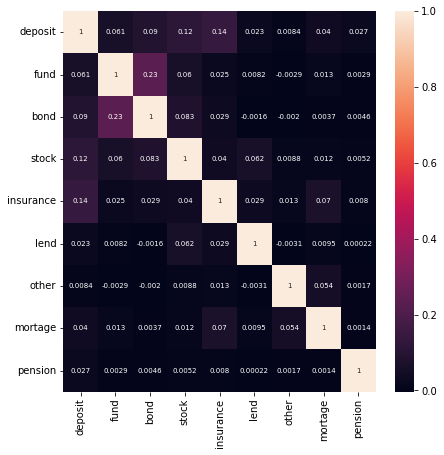

In [15]:
plt.figure(figsize=(7,7))
sns.heatmap(df[finname].corr(), annot=True,  annot_kws={"size": 7})
plt.yticks(rotation=0)
plt.show()